### Intermezzo on how to autoreload modules in ipynb

In [2]:
! ls funny.py

funny.py


In [3]:
! cat funny.py

def make_fun():
	print("To je legrace!!!")



In [6]:
from funny import make_fun

In [10]:
make_fun()

To je HODNE VELKA legrace!!!


In [8]:
%load_ext autoreload

In [9]:
%autoreload 2

In [161]:
import matplotlib.pyplot as plt
import numpy as np

# Python je objektově orientovaný jazyk

Objekt je kontejner, který může obsahovat dohromady proměnné a funkce, které spolu nějak logicky souvisí. Funkcím uvnitř objektů se z historických důvodů říká metody.

In [283]:
class Pes():   # trida, recept,  jak objekt Pes vypada
    latino = "Canis" #  promenne, ktere jsou *mimo* metody jsou stejne pro vsechny instance
    
    def __init__(self, name, age): # konstruktor, ktery umi vyrobit objekt typu Pes
        self.jmeno = name # promenne patrici danemu objektu jsou uvnitr objektu
                          # pristupne pres kouzelne sluvko 'self.'
        self.vek = age
    
    def stekej(self, nkrat=1): # funkce (metoda)
        for i in range(nkrat):
            print("Haf!")
            
    def __str__(self): # jina funkce
        return "Ja jsem {0}".format(self.jmeno)
    
# Tento Pes je tedy takovy kontejner, ktery obsahuje promenne
# self.jmeno,  self.vek, self.latino a metody (funkce)
# stekej a __str__

In [257]:
pes1 = Pes("Amina", 8) # instance pes1 tridy Pes
pes2 = Pes("Bobik", 5) # instance pes2 tridy Pes

In [167]:
print(pes1) # pridali jsme __str__
# kdyz se snazime vytisknout objekt, Pythonu zkusi,
# jestli je definovana metoda __str__

Ja jsem Amina


In [168]:
x = np.array([1,2,3])

In [169]:
x.max()

3

In [170]:
pes1.jmeno, pes1.vek, pes1.latino

('Amina', 8, 'Canis')

In [172]:
pes1.stekej(3)

Haf!
Haf!
Haf!


In [255]:
pes2.stekej(5)
pes2.jmeno, pes2.vek, pes2.latino,

Haf!
Haf!
Haf!
Haf!
Haf!


('Bobik', 5, 'Canis')

In [174]:
p = Pes("Alik", 0.5)
p.jmeno

'Alik'

In [175]:
p.vek

0.5

In [176]:
p.stekej()

Haf!


In [177]:
class Star:
    def __init__(self, x,y, name):
        self.x = x
        self.y = y
        self.name = name
        
    def distance_from(self, x0, y0):
        dist = np.sqrt( ( self.x - x0)**2 + ( self.y - y0)**2 )
        return dist
    
    def display(self):
        plt.plot([self.x],[self.y],"o")
        plt.text(self.x, self.y, self.name)

In [178]:
a = Star(10,20,"Alfa Centauri")
b = Star(30,15, "Beta Persei")

In [180]:
a.x, a.y, a.name

(10, 20, 'Alfa Centauri')

In [181]:
image = [a,b]

In [182]:
image

[<__main__.Star at 0x7f833219a580>, <__main__.Star at 0x7f833219a8e0>]

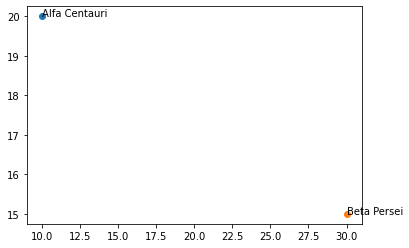

In [183]:
for o in image:
    o.display()

In [184]:
a.distance_from(b.x, b.y)

20.615528128088304

In [185]:
class Galaxy(Star):
    def __init__(self, x,y,name,r):
        super().__init__(x,y,name) ## self.x = x, self.y = y, self.name=name
        # super() odkazuje na 
        self.r = r
        
    def display(self):
        plt.scatter([self.x],[self.y],s=[self.r**2])
        plt.text(self.x, self.y, self.name)

In [186]:
g = Galaxy(4,26,"M31",r=40)

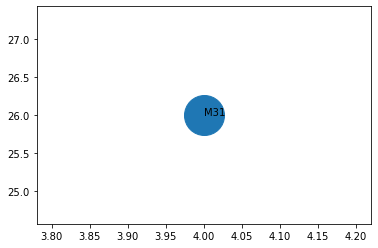

In [187]:
g.display()

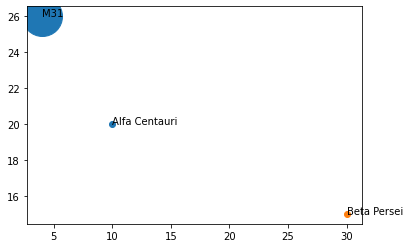

In [188]:
foto = [a,b,g]
for astro in foto:
    astro.display()

In [189]:
class Astrosource:
    def __init__(self, x,y, name):
        self.x = x
        self.y = y
        self.name = name
        
    def distance_from(self, x0, y0):
        dist = np.sqrt( ( self.x - x0)**2 + ( self.y - y0)**2 )
        return dist
    
    def display(self):
        plt.plot([self.x],[self.y],"o")
        plt.text(self.x, self.y, self.name)


In [193]:
class Star(Astrosource):
    def __init__(self, x,y,name,T):
        super().__init__(x,y,name)
        self.T = T
        
    def display(self):
        if self.T < 6000:
            c = 'red'
        else:
            c = 'blue'
        plt.plot([self.x],[self.y],"o", color=c)
        plt.text(self.x, self.y, self.name)

In [194]:
a = Star(20,30,"alfa", 3000.)

In [195]:
a.T

3000.0

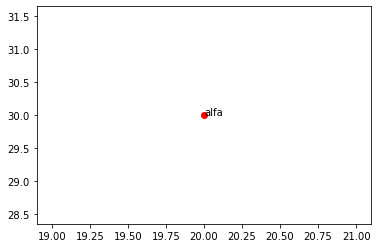

In [196]:
a.display()

In [200]:
class Galaxy(Astrosource):
    def __init__(self, x,y,name,r):
        super().__init__(x,y,name) ## self.x = x, self.y = y, self.name=name
        self.r = r
    
    def distance_from(self, x0, y0):
        dist = ( ( self.x - x0)**2 + ( self.y - y0)**2 )**(-1/4.)
        # moje pofiderni pocitani vzdalenosti pro galaxie, asi zakrivuji casoprostor...
        return dist
    
    def display(self):
        plt.scatter([self.x],[self.y],s=[self.r**2])
        plt.text(self.x, self.y, self.name)

In [201]:
g = Galaxy(45,2, "M31", 100)

In [202]:
g.distance_from(0,0)

0.14899767384211135

In [203]:
from scipy import interpolate

In [204]:
x = np.arange(0,10)
y = np.exp(-x/5.)

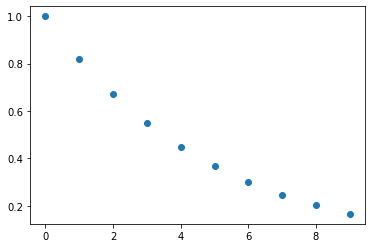

In [205]:
plt.plot(x,y,"o")

In [210]:
f = interpolate.interp1d(x,y) # konstruktor

In [213]:
f.bounds_error = False
f.bounds_error

False

In [214]:
x_new = np.arange(0,10,0.1)
x_new

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [215]:
y_new = f(x_new) # f.__call__(x_new)

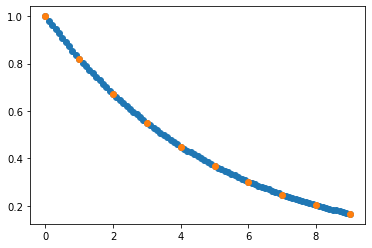

In [216]:
plt.plot(x_new, y_new,"o")
plt.plot(x,y,"o")

In [217]:
# from sklearn # scikit-learn
def generate_data(N=20):
    x = np.random.random(N)
    sigmy_y = 0.1 * np.ones(N)
    y = x - 0.2 + sigmy_y * np.random.randn(N)
    return np.vstack([x,y])

In [218]:
x,y = generate_data()

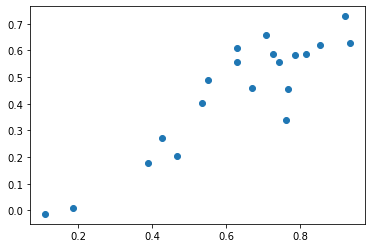

In [219]:
plt.plot(x,y,"o")

In [220]:
from sklearn.linear_model import LinearRegression

In [221]:
model = LinearRegression()

In [230]:
X = x[:,np.newaxis] # autori v sklearn chteji, aby vstup pro metodu fit byl ve 
# formatu fit( matice_X, vektor_y), tak  z 1D vektoru o N  prvcich delame
# matici o rozmerech N x 1

In [231]:
x.shape, X.shape

((20,), (20, 1))

In [232]:
model.fit(X,y)

LinearRegression()

In [233]:
model.intercept_, model.coef_

(-0.0990825348565717, array([0.86366956]))

In [234]:
x_new = np.linspace(0,1,20)[:,np.newaxis]
y_fit = model.predict(x_new)

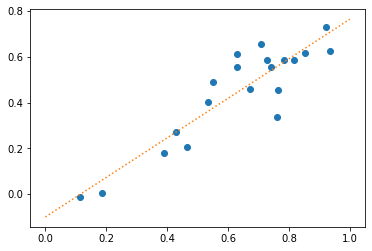

In [235]:
plt.plot(x,y,"o")
plt.plot(x_new, y_fit,":")

In [236]:
from sklearn.svm import SVR

model2 = SVR(kernel="rbf")
model2.fit(X,y)
y_new = model2.predict(x_new)

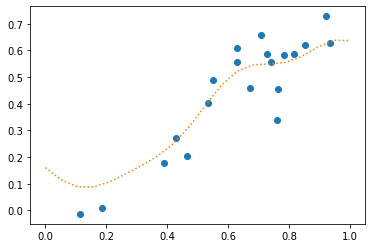

In [237]:
plt.plot(x,y,"o")
plt.plot(x_new, y_new,":")

In [238]:
model.score(X,y)

0.8130984541122197

In [239]:
model2.score(X,y)

0.8519529495018997

In [240]:
a = np.array([1,2,4])

In [241]:
np.max(a)

4

In [242]:
a.max()

4

In [243]:
a.size

3

In [244]:
# class array
#  ....
#     self.size = len(vector)

In [245]:
models = [LinearRegression, SVR]
pars = [None, {'kernel':'rbf'}]

for M, par in zip(models, pars):
    if par:
        model = M(**par)
    else:
        model = M()
    model.fit(X,y)
    score = model.score(X,y)
    print("Model ", M.__name__, " dosahl skore ", round(score,3) )

Model  LinearRegression  dosahl skore  0.813
Model  SVR  dosahl skore  0.852


In [246]:
a = [ 1,2,3]
b = ["ja", "ty", "hroch"]

for i in range(len(a)):
    print( a[i], b[i])
    
    

1 ja
2 ty
3 hroch


In [247]:
for cislo, jmeno, i in zip(a, b, a):
    print( cislo, jmeno, i)

1 ja 1
2 ty 2
3 hroch 3


In [248]:
def f(x,y,z):
    return x+y+z

In [249]:
f(1,4,10)

15

In [250]:
arg = [1,4,10]
f(*arg) # * ---> [1,4,10] --> 1, 4, 10

15

In [251]:
def f(x=10, y=20, z=30):
    return x+y+z

In [252]:
f(y=100)

140

In [253]:
arg = { 'x': 10, 'y': 40, 'z': 100}

In [254]:
f(**arg) # f(x= arg['x'], y = arg['y'], z= arg['z'])

150

Benefits of the objects:

- follow better the logic what is related to what
- you can inherit parts of the existing code and update only small parts adjusting it to your actual needs. It's much safer than copy and paste
- many different objects of the 'same kind' can use same interface

You can live easily without using the benefits objects, for example in our case, you can create a vector of astro object names, another vector for x-position, y-position, etc... and write general functions that meeasure the distance and do plotting... For stars you can set the radius to -1 or None... but objects are more fancy and easier to read.

Don't get too mad and don't write objects everywhere... Keep in mind that many operations are much faster on vectors using *numpy*! If you have the positions of all star and you want to calculate the position of the centre of the star cluster, it's definitely faster to store the x and y positions in an numpy array and calculate the *np.mean(x)*, *np.mean(y)*, than to loop over all the *Astrosource* objects in a for-loop... The later is easier to read but much slower:

However, if you have N astronomical sources, each with a different spectrum, it make sense to have one general object for a spectrum and to have object children for generating different spectral variations (power-law, black-body, spectrum with spectral lines...)

In [279]:
x = np.array([1.,230.,3.])
y = np.array([10.,32.,13.])
centre_x = np.mean(x)
centre_y = np.mean(y)
print(centre_x, centre_y)

78.0 18.333333333333332


In [280]:
class Source():
    def __init__(self,x,y):
        self.x = x
        self.y = y

In [281]:
seznam = [Source(1,10), Source(230,32), Source(3,13)]
centre_x = 0
centre_y = 0
for o in seznam:
    centre_x += o.x
    centre_y += o.y
centre_x = centre_x/len(seznam)
centre_y = centre_y/len(seznam)
print(centre_x, centre_y)

78.0 18.333333333333332
